In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
raw = pd.read_csv("train.csv")
raw_test=pd.read_csv("test.csv")

(1)We will use Describe function to get the detail of features in our dataset.                          
(2)Pandas describe() is used to view some basic statistical details like percentile, mean, std e

In [3]:
raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This shows that column age has 177 missing values.

(1)Next we will use DataFrame.info() function.               
(2)Pandas dataframe.info() function is used to get a concise(Brief but explantory) summary of the dataframe.

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This shows:
Age and Cabin has many missing values and some values are missed in Embarked

In [6]:
raw.describe(include=['O'])# To call describe() on just the numerical columns use describe(include = [np.number])
                            #To call describe() on just the objects (strings) using describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ford, Mrs. Edward (Margaret Ann Watson)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
#raw.describe(include='all') it will describe your whole data

Assumtions based on data analysis
## Correlation.

We want to know corelation of a feature with Survival.
for eg.If class feature has any advantage to survival rate i.e 1st class people are more likely to survive

## Completing.

(1)We want to complete Age feature as it is definitely correlated to survival and has many missing values         
(2)We want to complete the Embarked feature as well                                                  
(3)Ticket feature will be dropped beacuse it has 88% unique values which means it has very low correlation to survival.       
(4)Cabin feature will be dropped as it is highly incomplete             
(5)PassengerId will be dropped as it does not correlate to survival.            
(6)Name feature will be dropped as it does not directly correlate to survival.             

-----------------------------------------------------------------------

For Categorical data we can use pivot table to summarize the no of entries in your dataset        
For eg:                     
index= Sex                                                    
Value = Survied                                                           
It will create a table on basis of sex wheteher they survived or not which shows 74% women survied

In [8]:
sex_pivot = raw.pivot_table(index="Sex",values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


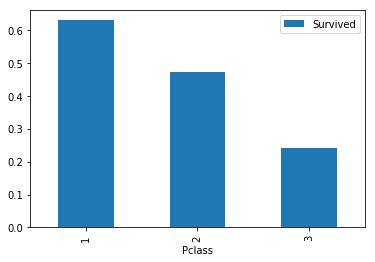

In [9]:
pclass_pivot=raw.pivot_table(index='Pclass', values='Survived')
pclass_pivot.plot.bar()
plt.show()

In [10]:
sib_pivot=raw.pivot_table(index='SibSp',values='Survived')
sib_pivot

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


# Seaborn.Facetgrid
This class maps a dataset onto multiple axis arrayed in grid of rows and columns
#### We can pass two or more features for corelating them


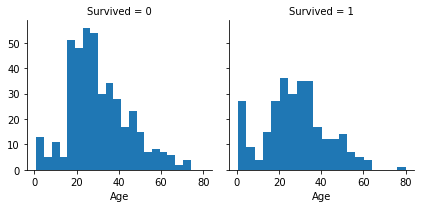

In [11]:
# Visulazing correlation
g = sns.FacetGrid(raw, col='Survived')
g.map(plt.hist, 'Age', bins=20)

D:\Anacondda\a\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anacondda\a\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


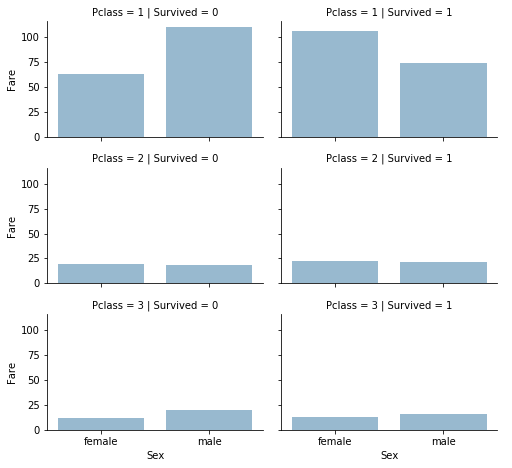

In [12]:
grid = sns.FacetGrid(raw, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [13]:
#raw['Age'] = raw['Age'].fillna(raw['Age'].median())
#Use same features for test also

In [14]:
train_df = raw.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
test_df = raw_test.drop(['PassengerId','Ticket', 'Cabin'],axis=1)

In [15]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


 ###### To extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In [16]:
combine = [train_df, test_df]
combine

[     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 5           0       3                                   Moran, Mr. James   
 6           0       1                            McCarthy, Mr. Timothy J   
 7           0       3                     Palsson, Master. Gosta Leonard   
 8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
 9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
 10          1       3                    Sandstrom, Miss. Marguerite Rut   
 11          1       1                           Bonnell, Miss. Elizabeth   

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. 
#The expand=False flag returns a DataFrame.
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


This shows that Miss, Master,Mr,Mrs are max in number and rest title are the rare one      
###### NAME  feature is unique one(different names) so we are extracting title from name to find the correlation between Name and survival

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df.pivot_table(index='Title',values='Survived')    
#train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


Now based on new feature Title we can guess the missing age.
For eg Title Master will be children and will be from 0 to 16 and that is filled by taking the mean of age of all title master.

In [19]:
t_mean=[]
Rare_mean=train_df[train_df['Title']=='Rare']['Age'].mean()
t_mean.append(Rare_mean)
Mrs_mean=train_df[train_df['Title']=='Mrs']['Age'].mean()
t_mean.append(Mrs_mean)
Miss_mean=train_df[train_df['Title']=='Miss']['Age'].mean()
t_mean.append(Miss_mean)
Mr_mean=train_df[train_df['Title']=='Mr']['Age'].mean()
t_mean.append(Mr_mean)
Master_mean=train_df[train_df['Title']=='Master']['Age'].mean()
t_mean.append(Master_mean)
print(Master_mean,Miss_mean,Mr_mean,Mrs_mean,Rare_mean)

#Master_median=train_df[train_df['Title']=='Master']['Age'].median()
#Miss_median=train_df[train_df['Title']=='Miss']['Age'].median()
#Mr_median=train_df[train_df['Title']=='Mr']['Age'].median()
#Mrs_median=train_df[train_df['Title']=='Mrs']['Age'].median()
#Rare_median=train_df[train_df['Title']=='Rare']['Age'].median()
#print(Master_median,Miss_median,Mr_median,Mrs_median,Rare_median)



4.574166666666667 21.845637583892618 32.368090452261306 35.788990825688074 45.54545454545455


Thus mean of every title is calculated

In [20]:
t=[]
f=train_df.columns
#t.append(list(set(train_df['Title'])))
t1=['Rare','Mrs','Miss','Mr','Master']
t.append(t1)
t.append(t_mean)
t

[['Rare', 'Mrs', 'Miss', 'Mr', 'Master'],
 [45.54545454545455,
  35.788990825688074,
  21.845637583892618,
  32.368090452261306,
  4.574166666666667]]

In [21]:
f

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

(1)Below Python code will take the every row and check for nan values in Age column                        
(2)And will check the title assosiated with it .                                   
(3)After matching the title it will take the corresponding mean value from the t list.

In [22]:
for i in range(0, train_df.shape[0]):
    if np.isnan(train_df.Age[i])==True:
        for j in range(0, 5):
            if train_df.Title[i] == t[0][j]:
                train_df.Age[i] = t[1][j]

D:\Anacondda\a\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Same thing is repeated for test data

In [23]:
t_test_mean=[]
Rare_test_mean=test_df[test_df['Title']=='Rare']['Age'].mean()
t_test_mean.append(Rare_test_mean)
Mrs_test_mean=test_df[test_df['Title']=='Mrs']['Age'].mean()
t_test_mean.append(Mrs_test_mean)
Miss_test_mean=test_df[test_df['Title']=='Miss']['Age'].mean()
t_test_mean.append(Miss_test_mean)
Mr_test_mean=test_df[test_df['Title']=='Mr']['Age'].mean()
t_test_mean.append(Mr_test_mean)
Master_test_mean=test_df[test_df['Title']=='Master']['Age'].mean()
t_test_mean.append(Master_test_mean)
print(Master_test_mean,Miss_test_mean,Mr_test_mean,Mrs_test_mean,Rare_test_mean)

#Master_median=train_df[train_df['Title']=='Master']['Age'].median()
#Miss_median=train_df[train_df['Title']=='Miss']['Age'].median()
#Mr_median=train_df[train_df['Title']=='Mr']['Age'].median()
#Mrs_median=train_df[train_df['Title']=='Mrs']['Age'].median()
#Rare_median=train_df[train_df['Title']=='Rare']['Age'].median()
#print(Master_median,Miss_median,Mr_median,Mrs_median,Rare_median)



7.406470588235294 21.774843750000002 32.0 38.903225806451616 43.833333333333336


In [24]:
t_test=[]
t1_test=['Rare','Mrs','Miss','Mr','Master']
t_test.append(t1_test)
t_test.append(t_test_mean)



In [25]:
t_test

[['Rare', 'Mrs', 'Miss', 'Mr', 'Master'],
 [43.833333333333336,
  38.903225806451616,
  21.774843750000002,
  32.0,
  7.406470588235294]]

In [26]:
for i in range(0, test_df.shape[0]):
    if np.isnan(test_df.Age[i])==True:
        for j in range(0, 5):
            if test_df.Title[i] == t_test[0][j]:
                test_df.Age[i] = t_test[1][j]

D:\Anacondda\a\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,32.368090,0,0,8.4583,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C,Mrs


In [28]:
combine = [train_df, test_df]


Now we will check whether a person is alone or with family:i.e- Sibs and parch feature will help to make a feature

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

Thus we have located and created new feature IsAlone                                     
Now we will drop Parch Sibsp and Family Size Feature

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

Will convert the Fare into category data using FareBand Feature                             
Will cut the Fare in three steps

In [32]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 3)

In [33]:
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [34]:
test_df.Fare=test_df.Fare.fillna(test_df.Fare.mean())

In [35]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    

We Will Assign the new Values of Fare to a Particular Category

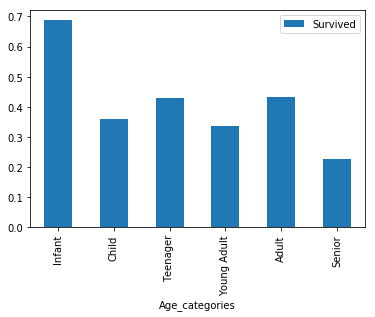

In [36]:
def process_age(train_df,cut_points,label_names):
    #raw["Age"] = draw["Age"].fillna(-0.5)
    train_df["Age_categories"] = pd.cut(train_df["Age"],cut_points,labels=label_names)
    return train_df

cut_points = [0, 5, 12, 18, 35, 60, 100]
label_names = ['Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train_df,cut_points,label_names)
#test = process_age(test,cut_points,label_names)

age_cat_pivot = train_df.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

Same process For the test data


In [37]:
def process_age(test_df,cut_points,label_names):
    #raw["Age"] = draw["Age"].fillna(-0.5)
    test_df["Age_categories"] = pd.cut(test_df["Age"],cut_points,labels=label_names)
    return test_df

cut_points = [0, 5, 12, 18, 35, 60, 100]
label_names = ['Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(test_df,cut_points,label_names)
#test = process_age(test,cut_points,label_names)

#age_cat_pivot = test_df.pivot_table(index="Age_categories",values="Survived")
#age_cat_pivot.plot.bar()
#plt.show()

Will drop the the null values of embarked column

In [38]:
train_df=train_df.dropna()
test_df=test_df.dropna()

In [39]:
combine=[train_df,test_df]

###### There are two steps in this tutorial to convert the data into the form requried by algorithm



# Step1:Converting categorical feature to numeric

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

In [41]:
for dataset in combine:
    dataset['Age_categories'] = dataset['Age_categories'].map( {'Infant': 0, 'Child': 1, 'Adult': 2, 'Teenager':3, 'Young Adult':4, 'Adult':5, 'Senior':6} ).astype(int)

In [42]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map( {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Rare':4} ).astype(int)

In [43]:
label = train_df["Survived"]

Now we will drop the rest of features

In [44]:
train_df  = train_df.drop("Name",axis=1)
train_df=train_df.drop("Age",axis=1)
train_df=train_df.drop("Survived",axis=1)

In [45]:
test_df  = test_df.drop("Name",axis=1)
test_df  = test_df.drop("Sex",axis=1)


In [46]:
clf = RandomForestClassifier(n_estimators=10) #100 tress in the forest of classifier

scores=cross_val_score(clf,train_df,label,cv=10,scoring='accuracy')


In [47]:
scores.mean()

0.8121935648621041

In [54]:
clf.fit(train_df,label)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
result=clf.predict(test_df)

In [56]:
result

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [57]:
check = pd.read_csv("Results.csv")


In [58]:
result1=check.Survived

In [59]:
result1=list(result1)

In [60]:
j=0
for i in range(len(result)):
    if result[i]==result1[i]:
        j=j+1
print(j)
print(len(result))

399
418


In [188]:
Reultcsv=pd.DataFrame(result)

In [189]:
Reultcsv.to_csv("Results.csv")

Feature ranking:
1. feature 1 (0.288637)
2. feature 4 (0.180375)
3. feature 0 (0.178682)
4. feature 2 (0.127685)
5. feature 6 (0.116979)
6. feature 3 (0.069540)
7. feature 5 (0.038102)


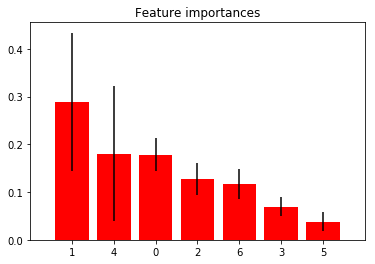

In [57]:
import matplotlib.pyplot as plt
import numpy as np
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_df.shape[1]), indices)
plt.xlim([-1, train_df.shape[1]])
plt.show()

In [64]:
train_df.columns[5]

'IsAlone'

# Thus Important features for Predicting survival Rate are in Decending Order:
### (1)Sex
### (2)Title
### (3)Pclass
### (4)Fare
### (5)Age
### (6)Embarked
### (7)IsAlone

# Either of should be run Step 1 or Step 2

# Step 2:One hot Encoding

In [106]:
label = train_df["Survived"]

In [107]:
train_df  = train_df.drop("Name",axis=1)
train_df=train_df.drop("Age",axis=1)
train_df=train_df.drop("Survived",axis=1)

In [108]:
test_df  = test_df.drop("Name",axis=1)
test_df  = test_df.drop("Sex",axis=1)


Remaining categorical data needs to be get converted before training our model.                       
(1)to dict will convert every row into dict.                                                       
(2)fit transform method will transform the feature and its value into vector                                          
eg sex = male,female had only one column before fit_transform method after that it will have different column for each value of feature                                                                                
(4)we can even use sklearn one hot vector

In [109]:
data_dict = train_df.T.to_dict().values()


In [110]:
data_dict

dict_values([{'Pclass': 3, 'Sex': 'male', 'Fare': 0, 'Embarked': 'S', 'Title': 'Mr', 'IsAlone': 0, 'Age_categories': 'Young Adult'}, {'Pclass': 1, 'Sex': 'female', 'Fare': 3, 'Embarked': 'C', 'Title': 'Mrs', 'IsAlone': 0, 'Age_categories': 'Adult'}, {'Pclass': 3, 'Sex': 'female', 'Fare': 1, 'Embarked': 'S', 'Title': 'Miss', 'IsAlone': 1, 'Age_categories': 'Young Adult'}, {'Pclass': 1, 'Sex': 'female', 'Fare': 3, 'Embarked': 'S', 'Title': 'Mrs', 'IsAlone': 0, 'Age_categories': 'Young Adult'}, {'Pclass': 3, 'Sex': 'male', 'Fare': 1, 'Embarked': 'S', 'Title': 'Mr', 'IsAlone': 1, 'Age_categories': 'Young Adult'}, {'Pclass': 3, 'Sex': 'male', 'Fare': 1, 'Embarked': 'Q', 'Title': 'Mr', 'IsAlone': 1, 'Age_categories': 'Young Adult'}, {'Pclass': 1, 'Sex': 'male', 'Fare': 3, 'Embarked': 'S', 'Title': 'Mr', 'IsAlone': 1, 'Age_categories': 'Adult'}, {'Pclass': 3, 'Sex': 'male', 'Fare': 2, 'Embarked': 'S', 'Title': 'Master', 'IsAlone': 0, 'Age_categories': 'Infant'}, {'Pclass': 3, 'Sex': 'female',

In [113]:
v = DictVectorizer()
X = v.fit_transform(data_dict).toarray()
X_features = v.get_feature_names()

In [114]:
training_data = pd.DataFrame(X,columns = X_features) #training data is prepared here without label


In [115]:
training_data

,Age_categories=Adult,Age_categories=Child,Age_categories=Infant,Age_categories=Senior,Age_categories=Teenager,Age_categories=Young Adult,Embarked=C,Embarked=Q,Embarked=S,Fare,IsAlone,Pclass,Sex=female,Sex=male,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Rare
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
x1 = training_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df = pd.DataFrame(x_scaled)

In [119]:
training_data.columns

Index(['Age_categories=Adult', 'Age_categories=Child', 'Age_categories=Infant',
       'Age_categories=Senior', 'Age_categories=Teenager',
       'Age_categories=Young Adult', 'Embarked=C', 'Embarked=Q', 'Embarked=S',
       'Fare', 'IsAlone', 'Pclass', 'Sex=female', 'Sex=male', 'Title=Master',
       'Title=Miss', 'Title=Mr', 'Title=Mrs', 'Title=Rare'],
      dtype='object')

In [131]:
clf = RandomForestClassifier(n_estimators=100) #100 tress in the forest of classifier


In [121]:

scores=cross_val_score(clf,training_data,label,cv=10,scoring='accuracy')


In [122]:
scores.mean()

0.8189351378958121

In [132]:
clf.fit(tradf,label)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
clf.predict

# Logistic Regression

In [123]:
logreg = LogisticRegression()
#logreg.fit(X_train, Y_train)

In [124]:
scores=cross_val_score(logreg,training_data,label,cv=10,scoring='accuracy')


D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\s

In [125]:
scores.mean()

0.8110827374872318

# SVC

In [126]:
svc = SVC()
scores=cross_val_score(svc,df,label,cv=10,scoring='accuracy')
print(scores.mean())

D:\Anacondda\a\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

0.7941394279877427


# KNN

In [127]:
knn = KNeighborsClassifier(n_neighbors = 3)
scores=cross_val_score(knn,df,label,cv=10,scoring='accuracy')
scores.mean()

0.7694203268641471

# GaussianNB

In [128]:
gaussian = GaussianNB()
scores=cross_val_score(gaussian,df,label,cv=10,scoring='accuracy')
scores.mean()

0.7851506639427988

# Decision Tree

In [130]:
decision_tree = DecisionTreeClassifier()
scores=cross_val_score(decision_tree,df,label,cv=10,scoring='accuracy')
scores.mean()

0.8076864147088866

In [102]:
test_df.shape

(418, 7)